## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по типу отеля: "городской" или "курортный".

Установливаем библиотеку Pandas:

In [242]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем необходимые модули:

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [244]:
data = pd.read_csv('/content/songs.csv', sep = ',', header=0, engine = 'python')
data

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


Выводим первые 10 строк dataset-а:

In [245]:
data.head(10)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
5,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,NaN,242,en,Attribution-NonCommercial-NoDerivatives (aka M...,205,NaN,4,NaN,[],Squares And Circles
6,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,NaN,268,en,Attribution-NonCommercial-NoDerivatives (aka M...,197,NaN,0,NaN,[],Maps of the Stars Homes
7,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],...,NaN,815,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,270,NaN,1,NaN,[],Boss of Goth
8,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],...,NaN,468,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,122,NaN,2,NaN,[],Industry Standard Massacre
9,171,320000,0,NaN,2008-11-26 01:46:07,2008-11-26 00:00:00,80,0,Rock,[25],...,<p>Unreleased</p>,582,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,242,NaN,2,NaN,[],Marching as Technitions


Выводим последние 10 строк dataset-а:

In [246]:
data.tail(10)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
17724,154306,320000,0,NaN,2017-03-05 04:58:49,NaN,212,0,Hip-Hop,"[21, 539, 811]",...,NaN,1928,NaN,Attribution,1573,NaN,15,NaN,"['fleslit', 'trap beat free use', 'trap beat f...",Yummy
17725,154307,320000,0,NaN,2017-03-05 04:58:49,NaN,196,3,Hip-Hop,"[21, 539, 811]",...,NaN,2275,NaN,Attribution,1835,NaN,16,NaN,"['fleslit', 'trap beat free use', 'trap beat f...",12:01 AM
17726,154308,320000,0,NaN,2017-03-05 04:58:50,NaN,194,2,Hip-Hop,"[21, 539, 811]",...,NaN,3371,NaN,Attribution,2705,NaN,17,NaN,"['fleslit', 'trap beat free use', 'trap beat f...",MIA
17727,154309,320000,0,NaN,2017-03-05 04:58:52,NaN,162,5,Hip-Hop,"[21, 539, 811]",...,NaN,4525,NaN,Attribution,3589,NaN,18,NaN,"['fleslit', 'trap beat free use', 'trap beat f...",A1 Symphony
17728,154919,320000,0,Fleslit,2017-03-20 05:18:35,NaN,191,5,Hip-Hop,"[21, 539, 811]",...,NaN,2823,NaN,Attribution,2251,NaN,0,Fleslit,"['young', 'yung', 'young lord', 'yung lord', '...",London
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy
17733,155247,320000,0,Fleslit,2017-03-29 01:40:28,NaN,211,3,Hip-Hop,"[21, 539, 811]",...,NaN,1379,NaN,Attribution,1025,NaN,0,Fleslit,"['instrumental trap beat', 'love', 'instrument...",Love In The Sky


### О наборе данных:

These recommendations are so on point! How does this playlist know me so well?

Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.

For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves a direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.

To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest echonest json dataset link. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as danceability and acoustics on a scale from -1 to 1. These exist in two different files, which are in different formats - CSV and JSON. While CSV is a popular file format for denoting tabular data, JSON is another common file format in which databases often return the results of a given query.

Рассмотрим некоторые из признаков наших данных:

genre_top - жанр

composer - композитор

data_created - дата создания

duration - продолжительность песни

information - содержит информацию о песне

language_code - где была создана песня

license - вид лицензии

listens - количество прослушиваний

publisher - кто опубликовал данную песню

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [247]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'genre_top'], end="\n\n")
print(data["genre_top"][2], end="\n\n")
print(data["genre_top"].dtype, end="\n\n")
print(type(data["genre_top"]), end="\n\n")
print(type(data["genre_top"][2]), end="\n\n")

(17734, 21)

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

RangeIndex(start=0, stop=17734, step=1)

Rock

Rock

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [248]:
data.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [249]:
data.describe(include = ['object'])

,composer,date_created,date_recorded,genre_top,genres,genres_all,information,language_code,license,lyricist,publisher,tags,title
count,166,17734,1898,17734,17734,17734,482,4089,17714,53,52,17734,17734
unique,55,14158,196,2,371,283,110,13,58,12,15,282,16460
top,Mors Ontologica,2009-04-30 15:22:50,2008-11-26 00:00:00,Rock,[21],[21],"<p><a href=""http://www.myspace.com/theshambler...",en,Attribution-Noncommercial-No Derivative Works ...,Yshwa,Cherry Red Music (UK),[],Chicken and Cheese 2 (Foot Village cover)
freq,14,4,216,14182,2735,2735,22,3897,3731,13,20,15579,46


In [250]:
data.describe(include = 'all')

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
count,17734.000000,17734.000000,17734.000000,166,17734,1898,17734.000000,17734.000000,17734,17734,...,482,1.773400e+04,4089,17714,17734.000000,53,17734.000000,52,17734,17734
unique,NaN,NaN,NaN,55,14158,196,NaN,NaN,2,371,...,110,NaN,13,58,NaN,12,NaN,15,282,16460
top,NaN,NaN,NaN,Mors Ontologica,2009-04-30 15:22:50,2008-11-26 00:00:00,NaN,NaN,Rock,[21],...,"<p><a href=""http://www.myspace.com/theshambler...",NaN,en,Attribution-Noncommercial-No Derivative Works ...,NaN,Yshwa,NaN,Cherry Red Music (UK),[],Chicken and Cheese 2 (Foot Village cover)
freq,NaN,NaN,NaN,14,4,216,NaN,NaN,14182,2735,...,22,NaN,3897,3731,NaN,13,NaN,20,15579,46
mean,69394.145991,258971.413781,0.020695,NaN,NaN,NaN,220.942934,1.685237,NaN,NaN,...,NaN,1.678238e+03,NaN,NaN,1079.709541,NaN,6.184110,NaN,NaN,NaN
std,45784.589753,61535.621463,0.270070,NaN,NaN,NaN,177.906821,6.629402,NaN,NaN,...,NaN,9.394969e+03,NaN,NaN,4693.497635,NaN,7.075062,NaN,NaN,NaN
min,2.000000,-1.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,...,NaN,1.800000e+01,NaN,NaN,9.000000,NaN,0.000000,NaN,NaN,NaN
25%,29979.000000,220982.000000,0.000000,NaN,NaN,NaN,139.000000,0.000000,NaN,NaN,...,NaN,4.210000e+02,NaN,NaN,214.000000,NaN,2.000000,NaN,NaN,NaN
50%,64193.500000,256000.000000,0.000000,NaN,NaN,NaN,192.000000,1.000000,NaN,NaN,...,NaN,8.240000e+02,NaN,NaN,461.000000,NaN,5.000000,NaN,NaN,NaN
75%,109442.750000,320000.000000,0.000000,NaN,NaN,NaN,255.000000,2.000000,NaN,NaN,...,NaN,1.628000e+03,NaN,NaN,1018.000000,NaN,8.000000,NaN,NaN,NaN


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [251]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [252]:
data.corr()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
track_id,1.000000,0.240970,0.002342,-0.029592,-0.010985,0.004141,0.038695,0.030860
bit_rate,0.240970,1.000000,-0.002230,0.023969,-0.001800,-0.022650,-0.017140,0.074227
comments,0.002342,-0.002230,1.000000,0.023166,0.630017,0.417699,0.412506,-0.017872
duration,-0.029592,0.023969,0.023166,1.000000,0.008260,-0.005068,-0.004090,-0.039274
favorites,-0.010985,-0.001800,0.630017,0.008260,1.000000,0.667735,0.677138,-0.038298
interest,0.004141,-0.022650,0.417699,-0.005068,0.667735,1.000000,0.945520,-0.017139
listens,0.038695,-0.017140,0.412506,-0.004090,0.677138,0.945520,1.000000,-0.022499
number,0.030860,0.074227,-0.017872,-0.039274,-0.038298,-0.017139,-0.022499,1.000000


По данной матрице можно сделать вывод, что в общей массе корреляция между признаками достаточно мала (исключение составляют, например, признаки `stays_in_week_nights` и `stays_in_weekend_nights`).

Визуализируем данную матрицу корреляции:

In [253]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


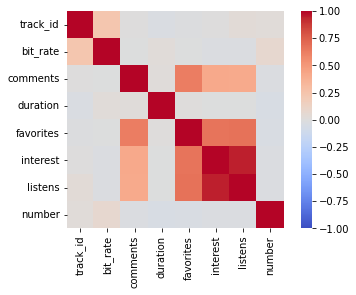

In [254]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

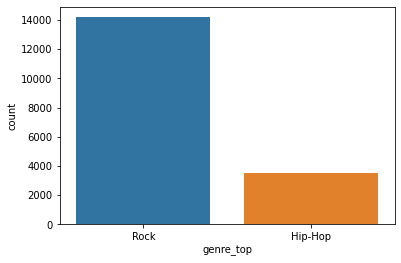

In [255]:
data['genre_top'].value_counts() / data['genre_top'].value_counts().sum()*100
sns.countplot(x='genre_top', data=data)
pass

## Готовим данные

In [256]:
# data['genre_top'] = data['genre_top'].astype('category')
data['composer'] = data['composer'].astype('category')
data['date_recorded'] = data['date_recorded'].astype('category')
data['information'] = data['information'].astype('category')
data['language_code'] = data['language_code'].astype('category')
data['license'] = data['license'].astype('category')
data['lyricist'] = data['lyricist'].astype('category')
data['publisher'] = data['publisher'].astype('category')

data.describe(include = 'all')

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
count,17734.000000,17734.000000,17734.000000,166,17734,1898,17734.000000,17734.000000,17734,17734,...,482,1.773400e+04,4089,17714,17734.000000,53,17734.000000,52,17734,17734
unique,NaN,NaN,NaN,55,14158,196,NaN,NaN,2,371,...,110,NaN,13,58,NaN,12,NaN,15,282,16460
top,NaN,NaN,NaN,Mors Ontologica,2009-04-30 15:22:50,2008-11-26 00:00:00,NaN,NaN,Rock,[21],...,"<p><a href=""http://www.myspace.com/theshambler...",NaN,en,Attribution-Noncommercial-No Derivative Works ...,NaN,Yshwa,NaN,Cherry Red Music (UK),[],Chicken and Cheese 2 (Foot Village cover)
freq,NaN,NaN,NaN,14,4,216,NaN,NaN,14182,2735,...,22,NaN,3897,3731,NaN,13,NaN,20,15579,46
mean,69394.145991,258971.413781,0.020695,NaN,NaN,NaN,220.942934,1.685237,NaN,NaN,...,NaN,1.678238e+03,NaN,NaN,1079.709541,NaN,6.184110,NaN,NaN,NaN
std,45784.589753,61535.621463,0.270070,NaN,NaN,NaN,177.906821,6.629402,NaN,NaN,...,NaN,9.394969e+03,NaN,NaN,4693.497635,NaN,7.075062,NaN,NaN,NaN
min,2.000000,-1.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,...,NaN,1.800000e+01,NaN,NaN,9.000000,NaN,0.000000,NaN,NaN,NaN
25%,29979.000000,220982.000000,0.000000,NaN,NaN,NaN,139.000000,0.000000,NaN,NaN,...,NaN,4.210000e+02,NaN,NaN,214.000000,NaN,2.000000,NaN,NaN,NaN
50%,64193.500000,256000.000000,0.000000,NaN,NaN,NaN,192.000000,1.000000,NaN,NaN,...,NaN,8.240000e+02,NaN,NaN,461.000000,NaN,5.000000,NaN,NaN,NaN
75%,109442.750000,320000.000000,0.000000,NaN,NaN,NaN,255.000000,2.000000,NaN,NaN,...,NaN,1.628000e+03,NaN,NaN,1018.000000,NaN,8.000000,NaN,NaN,NaN


In [257]:
data.isna().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [258]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [259]:
data['composer'].fillna(data['composer'].mode().iloc[0], inplace=True)
data['date_recorded'].fillna(data['date_recorded'].mode().iloc[0], inplace=True)
data['information'].fillna(data['information'].mode().iloc[0], inplace=True)
data['language_code'].fillna(data['language_code'].mode().iloc[0], inplace=True)
data['lyricist'].fillna(data['lyricist'].mode().iloc[0], inplace=True)
data['publisher'].fillna(data['publisher'].mode().iloc[0], inplace=True)
data['license'].fillna(data['license'].mode().iloc[0], inplace=True)

data.isna().sum()

track_id         0
bit_rate         0
comments         0
composer         0
date_created     0
date_recorded    0
duration         0
favorites        0
genre_top        0
genres           0
genres_all       0
information      0
interest         0
language_code    0
license          0
listens          0
lyricist         0
number           0
publisher        0
tags             0
title            0
dtype: int64

In [260]:
composer_dummies = pd.get_dummies(data['composer'])
# date_recorded_dummies = pd.get_dummies(data['date_recorded'])
# information_dummies = pd.get_dummies(data['information'])
language_code_dummies = pd.get_dummies(data['language_code'])
lyricist_dummies = pd.get_dummies(data['lyricist'])
publisher_dummies = pd.get_dummies(data['publisher'])
license_dummies = pd.get_dummies(data['license'])
genre_dummies = pd.get_dummies(data['genre_top'])


data = pd.concat((data, composer_dummies), axis=1)
# data = pd.concat((data, date_recorded_dummies), axis=1)
# data = pd.concat((data, information_dummies), axis=1)
data = pd.concat((data, language_code_dummies), axis=1)
data = pd.concat((data, lyricist_dummies), axis=1)
data = pd.concat((data, publisher_dummies), axis=1)
data = pd.concat((data, license_dummies), axis=1)
# data = pd.concat((data, genre_dummies), axis=1)

data.loc[data['genre_top'] == 'Rock', 'genre_top'] = 0
data.loc[data['genre_top'] == 'Hip-Hop', 'genre_top'] = 1

y = data['genre_top']

data = data.drop(['composer'], axis=1)
data = data.drop(['date_recorded'], axis=1)
data = data.drop(['information'], axis=1)
data = data.drop(['language_code'], axis=1)
data = data.drop(['lyricist'], axis=1)
data = data.drop(['publisher'], axis=1)
data = data.drop(['license'], axis=1)
# data = data.drop(['genre_top'], axis=1)
data = data.drop(['title'], axis=1)
data = data.drop(['date_created'], axis=1)
data = data.drop(['genres'], axis=1)
data = data.drop(['genres_all'], axis=1)
data = data.drop(['tags'], axis=1)


data.head()

,track_id,bit_rate,comments,duration,favorites,genre_top,interest,listens,number,Alexander Naumov,...,Attribution-Share Alike 3.0 United States,Attribution-ShareAlike,Attribution-ShareAlike 3.0 International,CC0 1.0 Universal,Creative Commons Attribution,Creative Commons Attribution-NonCommercial-NoDerivatives 4.0,Music Sharing,Noncommercial Sampling Plus,Sampling Plus,ideology.de
0,135,256000,1,837,0,0,2484,1832,0,0,...,0,0,0,0,0,0,0,0,0,0
1,136,256000,1,509,0,0,1948,1498,0,0,...,0,0,0,0,0,0,0,0,0,0
2,151,192000,0,192,0,0,701,148,4,0,...,0,0,0,0,0,0,0,0,0,0
3,152,192000,0,193,0,0,637,98,11,0,...,0,0,0,0,0,0,0,0,0,0
4,153,256000,0,405,5,0,354,424,2,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
data = data.loc[:,~data.columns.duplicated()]
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number,Alexander Naumov,?,...,Attribution-Share Alike 3.0 United States,Attribution-ShareAlike,Attribution-ShareAlike 3.0 International,CC0 1.0 Universal,Creative Commons Attribution,Creative Commons Attribution-NonCommercial-NoDerivatives 4.0,Music Sharing,Noncommercial Sampling Plus,Sampling Plus,ideology.de
count,1.773400e+04,1.773400e+04,1.773400e+04,17734.000000,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,...,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04,1.773400e+04
mean,1.153921e-16,-1.730881e-16,1.923201e-17,0.000000,5.609337e-18,-4.808003e-18,3.205335e-18,-4.487470e-17,-6.310504e-18,4.908170e-18,...,-1.282134e-17,-1.602668e-17,9.616006e-18,-4.006669e-19,-8.013339e-18,-7.051738e-17,6.510838e-18,4.808003e-18,1.041734e-17,-6.310504e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.515622e+00,-4.208496e+00,-7.662724e-02,-1.230661,-2.542066e-01,-1.767157e-01,-2.281261e-01,-8.740715e-01,-1.061998e-02,-7.509251e-03,...,-2.602088e-02,-1.092023e-01,-1.004036e-01,-1.839643e-02,-8.391100e-02,-4.130723e-01,-7.509251e-03,-2.491239e-02,-1.501977e-02,-1.061998e-02
25%,-8.608824e-01,-6.173565e-01,-7.662724e-02,-0.460595,-2.542066e-01,-1.338204e-01,-1.844487e-01,-5.913884e-01,-1.061998e-02,-7.509251e-03,...,-2.602088e-02,-1.092023e-01,-1.004036e-01,-1.839643e-02,-8.391100e-02,-4.130723e-01,-7.509251e-03,-2.491239e-02,-1.501977e-02,-1.061998e-02
50%,-1.135894e-01,-4.828770e-02,-7.662724e-02,-0.162686,-1.033634e-01,-9.092510e-02,-1.318227e-01,-1.673639e-01,-1.061998e-02,-7.509251e-03,...,-2.602088e-02,-1.092023e-01,-1.004036e-01,-1.839643e-02,-8.391100e-02,-4.130723e-01,-7.509251e-03,-2.491239e-02,-1.501977e-02,-1.061998e-02
75%,8.747180e-01,9.917603e-01,-7.662724e-02,0.191432,4.747979e-02,-5.347380e-03,-1.314788e-02,2.566607e-01,-1.061998e-02,-7.509251e-03,...,-2.602088e-02,-1.092023e-01,-1.004036e-01,-1.839643e-02,-8.391100e-02,-4.130723e-01,-7.509251e-03,-2.491239e-02,-1.501977e-02,-1.061998e-02
max,1.876720e+00,3.071856e+00,8.878926e+01,19.414978,8.331291e+01,1.103772e+02,9.223661e+01,1.326008e+01,9.415678e+01,1.331616e+02,...,3.842851e+01,9.156798e+00,9.959242e+00,5.435531e+01,1.191672e+01,2.420747e+00,1.331616e+02,4.013840e+01,6.657515e+01,9.415678e+01


In [262]:
data.columns

Index(['track_id', 'bit_rate', 'comments', 'duration', 'favorites',
       'genre_top', 'interest', 'listens', 'number', ' Alexander Naumov',
       ...
       'Attribution-Share Alike 3.0 United States', 'Attribution-ShareAlike',
       'Attribution-ShareAlike 3.0 International', 'CC0 1.0 Universal',
       'Creative Commons Attribution',
       'Creative Commons Attribution-NonCommercial-NoDerivatives 4.0',
       'Music Sharing', 'Noncommercial Sampling Plus', 'Sampling Plus',
       'ideology.de'],
      dtype='object', length=155)

In [263]:
data_stand.fillna(data_stand.median(axis = 0), axis=0 , inplace=True)

Разбиваем наши данные на y и x:

In [266]:
X = data_stand.drop('genre_top', axis = 1)
y = data_stand['genre_top']
feature_names = X.columns
print(feature_names)

Index(['track_id', 'bit_rate', 'comments', 'duration', 'favorites', 'interest',
       'listens', 'number', ' Alexander Naumov', '?',
       ...
       'Attribution-Share Alike 3.0 United States', 'Attribution-ShareAlike',
       'Attribution-ShareAlike 3.0 International', 'CC0 1.0 Universal',
       'Creative Commons Attribution',
       'Creative Commons Attribution-NonCommercial-NoDerivatives 4.0',
       'Music Sharing', 'Noncommercial Sampling Plus', 'Sampling Plus',
       'ideology.de'],
      dtype='object', length=154)


In [267]:
X=X.to_numpy()
y=y.to_numpy()

In [268]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[-1.51271741 -0.0482877   3.626118   ... -0.02491239 -0.01501977
  -0.01061998]
 [-1.51269557 -0.0482877   3.626118   ... -0.02491239 -0.01501977
  -0.01061998]
 [-1.51236795 -1.0883357  -0.07662724 ... -0.02491239 -0.01501977
  -0.01061998]
 ...
 [ 1.87117225  0.9917603  -0.07662724 ... -0.02491239 -0.01501977
  -0.01061998]
 [ 1.8711941   0.9917603  -0.07662724 ... -0.02491239 -0.01501977
  -0.01061998]
 [ 1.87514739  0.9917603  -0.07662724 ... -0.02491239 -0.01501977
  -0.01061998]]

[-0.50044401 -0.50044401 -0.50044401 ...  1.99811287  1.99811287
  1.99811287]

(17734, 154)

(17734,)



Разделим наш dataset на обучающую и тестовую выборку:

In [269]:
import sys
!{sys.executable} -m pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

12413 5321 (12413,) (5321,)


Интерпретируем все значения `y` как целые числа:

In [271]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [272]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [273]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [274]:
print(f"{err_train}")
print(f"{err_test}")

0.10094256021912511
0.12911106934786695


In [275]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[9696  267]
 [ 986 1464]]

[[4042  177]
 [ 510  592]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [276]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [277]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.06098445178441956
0.11708325502725052


## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [278]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.1714331748972851
0.1809810186055253


### Random Forest:

In [279]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.07818079308400677


### Extremely Randomized Trees:

In [280]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.07705318549144897


### AdaBoost (работает очень медленно):

In [281]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.10722629501329252
0.1223454237925202


### GBT (работает очень, очень медленно):

In [282]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.021429146862160638
0.046043976696109754


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.04. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
